# Accessing Simulation data directly

The Python interface also allows users to access simulation data directly, without requiring file output. In this notebook we repeat the "Two Stream" instability example, but now without any file I/O. The simulation parameters are the same as in the original example, but now we do not define any diagnostic routine:

In [1]:
import em1d

import numpy as np

nx = 120
box = 4 * np.pi
dt = 0.1
tmax = 50.0

ppc = 500
ufl = [0.4,    0.0,  0.0]
uth = [0.001,0.001,0.001]

right = em1d.Species( "right", -1.0, ppc, ufl = ufl, uth = uth )

ufl[0] = -ufl[0]
left  = em1d.Species( "left", -1.0, ppc, ufl = ufl, uth = uth )

# Initialize the simulation without diagnostics
sim = em1d.Simulation( nx, box, dt, [right,left] )

# Run the simulation
sim.run( tmax )

Running simulation up to t = 50 ...
n = 501, t = 50.1
Done.


## Grid data

We can acces the raw electric field, magnetic field and current density data of a `Simulation` object `sim` through the `sim.emf.E`, `sim.emf.B` and `sim.current.J` properties, respectively. Each of these properties will be a [nx, 3] NumPy float32 array that can be used as usual:

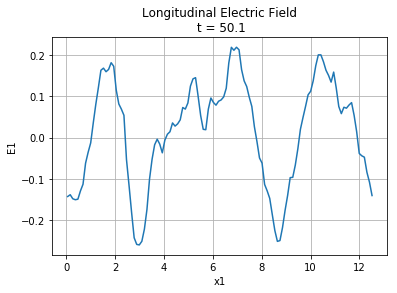

In [4]:
import matplotlib.pyplot as plt

# Plot field values at the center of the cells
xmin = sim.emf.dx/2
xmax = sim.emf.box - sim.emf.dx/2

plt.plot(np.linspace(xmin, xmax, num = sim.emf.nx), sim.emf.E[:,0] )
plt.xlabel("x1")
plt.ylabel("E1")
plt.title("Longitudinal Electric Field\n t = {:g}".format(sim.t))
plt.grid(True)
plt.show()


## Particle data

We can access raw particle data using the `particles` property of each Species object. This property is a NumPy array of `t_part` structures containing:
* `ix` - the particle cell
* `x` - the particle position inside the cell
* `ux`, `uy`, `uz` - the particle generalized velocity in each direction

We can easily use this data to produce the phasespace plot for this simulation. Note that we had to convert the cell index / position to simulation position:

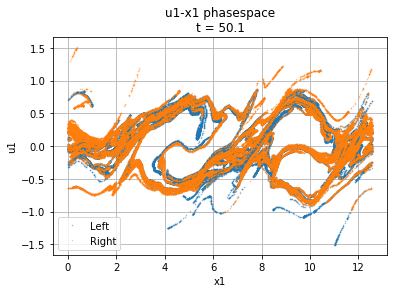

In [3]:
import matplotlib.pyplot as plt

# Simple function to convert particle positions
x = lambda s : (s.particles['ix'] + s.particles['x']) * s.dx 

plt.plot(x(left), left.particles['ux'], '.', ms=1,alpha=0.5, label = "Left")
plt.plot(x(right), right.particles['ux'], '.', ms=1,alpha=0.5, label = "Right")
plt.xlabel("x1")
plt.ylabel("u1")
plt.title("u1-x1 phasespace\nt = {:g}".format(sim.t))
plt.legend()
plt.grid(True)
plt.show()